In [8]:
import pandas as pd
import numpy as np

In [9]:
Df = pd.read_csv("BrentOilPrices.csv")
Df.head(5)

Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63

In [10]:
DF = Df.dropna(subset=["Date","Price"])

In [11]:
DF.describe()

Price
count  9011.000000
mean     48.420782
std      32.860110
min       9.100000
25%      19.050000
50%      38.570000
75%      70.090000
max     143.950000

In [12]:
print(DF["Date"].min())
print(DF["Date"].max())

01-Apr-02
Sep 30, 2022


In [13]:
DF["Date"] = pd.to_datetime(DF["Date"],)
DF["Price"] = pd.to_numeric(DF["Price"],)

/tmp/ipython-input-3020149685.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  DF["Date"] = pd.to_datetime(DF["Date"],)


<function matplotlib.pyplot.show(close=None, block=None)>

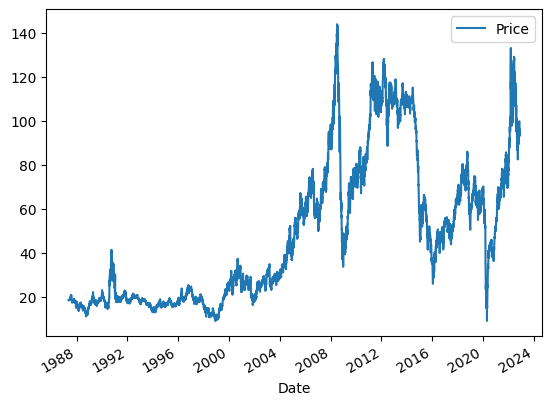

In [14]:
import matplotlib.pyplot as mpl
LINE_CHART = DF.plot(x="Date",y="Price",kind="line")
mpl.show

In [15]:
#TASK 3
DF["MA3"] = DF["Price"].rolling(window=3).mean()
DF["MA9"] = DF["Price"].rolling(window=9).mean()

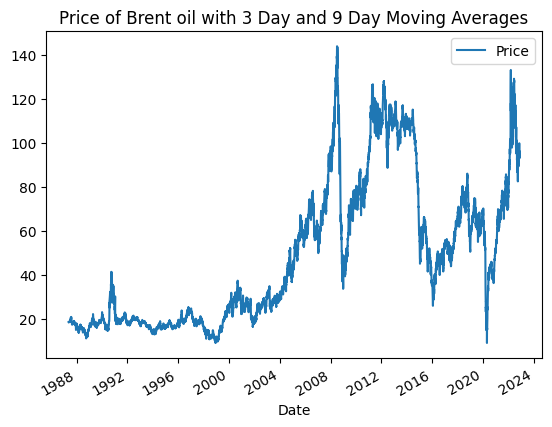

In [16]:
LINE_CHART = DF.plot(x="Date",y="Price",kind="line",title= "Price of Brent oil with 3 Day and 9 Day Moving Averages")
mpl.show()

In [17]:
print("\nData Info:")
print(DF.info())

print("\nMissing values per column:")
print(DF.isnull().sum())

print("\nDescriptive Statistics:")
print(DF.describe())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
 2   MA3     9009 non-null   float64       
 3   MA9     9003 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 281.7 KB
None

Missing values per column:
Date     0
Price    0
MA3      2
MA9      8
dtype: int64

Descriptive Statistics:
                                Date        Price          MA3          MA9
count                           9011  9011.000000  9009.000000  9003.000000
mean   2005-02-10 23:46:53.760958720    48.420782    48.418979    48.413159
min              1987-05-20 00:00:00     9.100000     9.270000     9.555556
25%              1996-03-20 12:00:00    19.050000    19.070000    19.058889
50%              2005-02-02 00:00:00    38.570000    38.783333

In [18]:
DF['MA3'] = DF['Price'].rolling(window=3).mean()
DF['MA9'] = DF['Price'].rolling(window=9).mean()

In [19]:
# 4
# clean data
DF_clean = DF[['Date', 'Price', 'MA3', 'MA9']].dropna()
from sklearn.model_selection import train_test_split
# drop rows with any NanN values(moving average)
DF_clean.dropna(inplace=True)
#convret 'date' to'date time'
DF_clean['Date'] = pd.to_datetime(DF_clean['Date'])
#Define features (x) and target (y)
X = DF_clean[['MA3', 'MA9']]
y = DF_clean['Price']

In [20]:
# perform 80/20 train-test split with a reproducible random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
#  Reset index for convenience
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Print summary
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 7202
Testing samples: 1801


In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

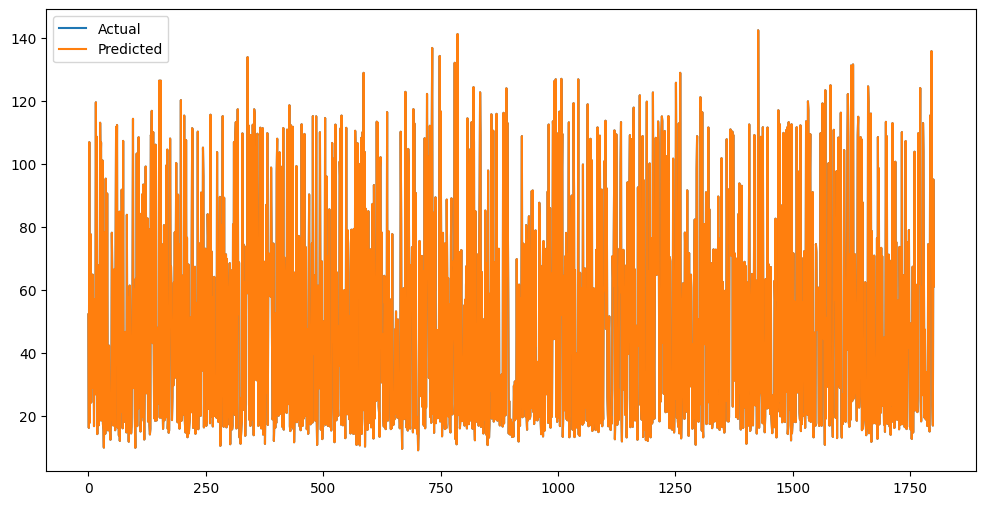

In [25]:
mpl.figure(figsize=(12,6))
mpl.plot(y_test.values, label='Actual')
mpl.plot(y_test, label='Predicted')
mpl.legend()
mpl.show()

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)
print("Model trained successfully.")
print("Intercept (alpha):", model.intercept_)
print("Coefficients (betas):", model.coef_)

Model trained successfully.
Intercept (alpha): 0.018408421874788417
Coefficients (betas): [ 1.21185012 -0.21225972]


In [61]:
#Task06
y_pred=model.predict(X_test)

In [62]:
import matplotlib.pyplot as mpl

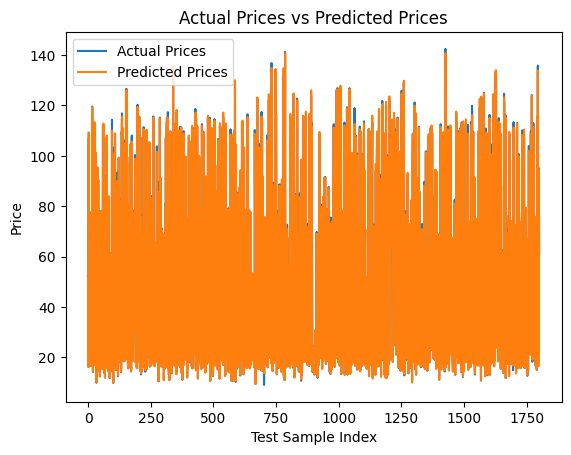

In [63]:

mpl.plot(y_test.values, label='Actual Prices')
mpl.plot(y_pred, label='Predicted Prices')
mpl.title('Actual Prices vs Predicted Prices')
mpl.xlabel('Test Sample Index')
mpl.ylabel('Price')
mpl.legend()
mpl.show()

In [64]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [65]:
r2= r2_score(y_test, y_pred)


In [66]:
mae = mean_squared_error(y_test, y_pred)

In [67]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [68]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [69]:
print("R² Score:",r2)
print("Mean Absolute Error (MAE):",mae)
print("Root Mean Squared Error (RMSE):",rmse)

R² Score: 0.99934745839441
Mean Absolute Error (MAE): 0.7332375477948972
Root Mean Squared Error (RMSE): 0.8562929100459126
